# EXAMEN - GONZALO MIGUEL GÓMEZ DEL HIERRO

En primer lugar vamos a generar los parámetros que se van a informar para la creación del dataset (que se llevará a cabo mediante la función make_regression de sklearn). Mi fecha de nacimiento es el 9 de junio de 1999.

In [106]:
# importación de librerías
import numpy as np
from sklearn.datasets import make_regression
import pandas as pd
import seaborn as sns
import copy as cp

In [107]:
# Generamos lo parámetros tal como se describe en el enunciado (09/06/1999)
m = 9+6
s1 = 9
# comento la siguiente línea para que no se rompa la coherencia al reejecutar
# s2 = np.random.randint(1,5) 
s2 = 4 # valor inicial obtenido, incluido para poder reejecutar sin romper el notebook
a=1999

In [108]:
print('s2 = {}'.format(s2))

s2 = 4


In [109]:
# generamos el conjunto de datos 
X, y = make_regression(n_samples=500+m,n_features=10+s1+s2,n_informative=10+s1,noise=10*s1,bias=2,shuffle=False,random_state=a)

De esta manera, hemos generado una muestra con m observaciones (n_samples) compuestas por 10+s1+s2 variables independientes (n_features) y una variable objetivo. De estas 10+s1+s2 variables independientes, s2 son redundantes (n_features - n_informative). El parámetro noise se corresponde con la desviación estándar del ruido que se aplica sobre la muestra perfectamente lineal, para romper dicha linealidad. Como también se puede ver en la documentación, el parámetro bias es la ordenada en el origen del modelo lineal del que se parte. Es decir, si el parámetro noise fuera 0, este bias sería la constante ($\beta_0$) en el modelo lineal $y = \beta_0 + \beta_1\cdot x_1 \cdot ... \cdot \beta_{10+s_1+s_2} \cdot x_{10+s_1+s_2}$. Se define el parámetro shuffle como False para que no se "barajen" observaciones y características.

Para poder ver de manera cómoda la información del conjunto de datos creado, vamos a integrarlo todo en un dataframe de la librería Pandas, que nos permite emplear directamente algunos métodos útiles.

In [110]:
# etiquetas para las n_features variables independientes + la variable independiente
columns = ['x{}'.format(i) for i in range(X.shape[1])]
columns.append('y')
# generamos un dataframe apropiado
df = pd.DataFrame(np.hstack((X,y[:, None])), columns=columns)

# describimos nuestro conjunto de datos con algunas funciones útiles
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
0,-0.317480,0.692062,-1.284378,0.393346,0.211803,-0.411457,0.945473,0.906433,-0.541158,1.204638,...,1.353890,0.804267,-0.355395,-0.804633,0.247044,-0.140479,-0.072590,-1.311976,-1.836959,101.593606
1,-0.241581,-0.830838,-1.377936,-0.096528,0.094396,-0.506670,0.624220,0.375006,0.852429,-0.633999,...,0.415251,-1.259956,-0.227572,0.404326,0.127519,-0.100616,0.194965,-1.533411,-0.601231,106.446044
2,1.280362,-0.066893,0.254026,1.065242,-1.791752,1.583481,0.110303,-0.028591,0.406122,1.686036,...,1.281054,0.256899,0.942982,-2.221908,-0.385831,0.369260,0.003005,-0.895873,-1.707936,332.887337
3,0.510309,-0.491197,1.574700,0.668085,-0.470858,-0.052428,-0.642659,-0.877692,-0.664727,1.470971,...,-0.809129,-0.963956,-1.794985,-0.700473,-0.811009,-0.009502,-0.299622,2.093173,-0.740827,-58.012980
4,0.069464,0.363515,0.143828,-1.600201,0.862060,0.871241,0.397860,-1.021002,-0.512252,-0.756797,...,-0.866779,1.302976,0.000415,-0.129024,0.690126,-0.230427,0.006052,0.464079,-0.104459,-175.145887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,1.462845,-1.326999,0.292287,-0.287487,0.691148,1.729091,-0.104531,-2.334862,1.680202,0.800874,...,0.117482,-0.392527,0.168543,-1.195768,1.160966,-0.658549,0.084653,1.584790,-0.407782,-107.706031
511,0.776313,-1.131815,0.480638,-0.386624,0.819782,1.977061,-0.912984,0.414402,1.338057,2.101512,...,-0.613059,-0.548573,-0.578250,-0.215159,-0.187473,0.560881,0.198613,-0.146773,-1.592810,37.297444
512,-0.163110,-0.520379,-1.035334,-0.586096,1.011395,0.179459,0.577972,-0.163274,-0.968416,0.213152,...,1.174064,-1.569103,-0.619830,-0.015942,0.018698,-1.162886,0.747527,1.404390,1.340463,15.066860
513,0.924158,0.582225,-1.781251,1.066854,1.403413,-0.241470,-0.870471,-0.303264,-2.101935,1.513839,...,-1.694500,-0.176298,0.706053,2.592830,-0.495021,-0.234607,0.306296,-0.137493,0.630081,-61.015762


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      515 non-null    float64
 1   x1      515 non-null    float64
 2   x2      515 non-null    float64
 3   x3      515 non-null    float64
 4   x4      515 non-null    float64
 5   x5      515 non-null    float64
 6   x6      515 non-null    float64
 7   x7      515 non-null    float64
 8   x8      515 non-null    float64
 9   x9      515 non-null    float64
 10  x10     515 non-null    float64
 11  x11     515 non-null    float64
 12  x12     515 non-null    float64
 13  x13     515 non-null    float64
 14  x14     515 non-null    float64
 15  x15     515 non-null    float64
 16  x16     515 non-null    float64
 17  x17     515 non-null    float64
 18  x18     515 non-null    float64
 19  x19     515 non-null    float64
 20  x20     515 non-null    float64
 21  x21     515 non-null    float64
 22  x2

Vemos que tenemos 23 variables independientes (10+s1+s2) y una variable dependiente (y). Además vemos que el número de observaciones (n_samples) es 515 (nuestro parámetro m).

In [112]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,...,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,-0.031916,-0.018579,-0.063151,-0.021909,0.013476,-0.001181,0.026900,0.013158,-0.077559,-0.027426,...,-0.005448,-0.014250,0.019805,0.063264,0.127322,0.011155,0.039549,0.022316,0.015988,9.216541
std,0.986544,1.017873,0.954387,1.012893,0.991497,0.981665,0.981380,0.990812,1.005245,0.975874,...,1.019443,0.966516,0.969294,0.998064,0.962973,0.966104,0.956670,0.981450,0.996918,236.614468
min,-3.779419,-3.658909,-3.210323,-3.109916,-2.474327,-3.026705,-3.537120,-2.962460,-2.665844,-2.676123,...,-3.427870,-3.565831,-2.770447,-3.073767,-2.723248,-2.386994,-2.768433,-3.209209,-2.747800,-685.839868
25%,-0.711398,-0.702240,-0.704915,-0.687428,-0.684554,-0.637186,-0.651610,-0.671965,-0.749489,-0.697305,...,-0.691434,-0.621313,-0.593593,-0.590866,-0.564741,-0.656772,-0.587554,-0.606704,-0.600697,-152.987811
50%,0.018907,-0.110463,0.004862,-0.031170,0.068542,-0.031397,0.039952,0.026018,-0.095659,-0.019338,...,-0.053982,0.043549,0.054638,0.045501,0.145512,0.028615,0.032970,-0.012728,0.022261,-7.880606
75%,0.650191,0.623574,0.539673,0.656907,0.704536,0.649443,0.704193,0.712172,0.573096,0.631577,...,0.663351,0.636121,0.682097,0.745959,0.767340,0.625252,0.650687,0.718792,0.671854,160.917009
max,3.014268,3.587054,2.776868,2.810854,3.348492,3.153710,2.622348,3.181456,3.879336,2.582256,...,3.850762,2.620665,2.707830,2.916495,3.023495,2.972084,3.258235,2.799680,3.435305,601.698464


Veamos en una representación gráfica el índice de correlación entre las variables independientes y dependiente, con el objetivo de hacernos una primera idea de qué variables pueden ser más colineales con otras.

<Axes: >

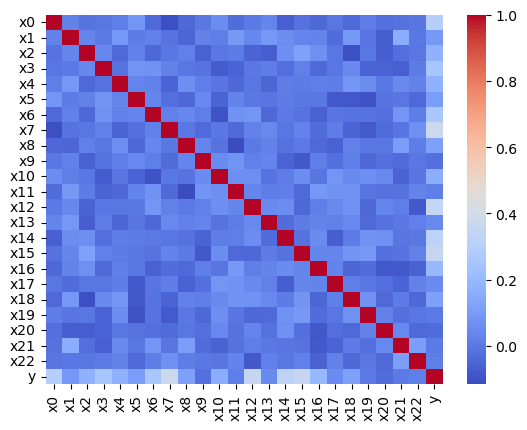

In [113]:
# Matriz de correlación
corr = df.corr(method='pearson')
# Mapa de calor sobre las correlaciones entre variables
sns.heatmap(corr, cmap='coolwarm')

Vemos que es en las posiciones correspondientes a la correlación de caada variable independiente con la variable y donde vemos los colores que indican más correlación. Sin embargo, sí que se observan entre las últimas variables independientes colores que indican correlación baja con la variable dependiente.

A continuación, vamos a representar los pares $(x_i,y)$ para los 23 valores de i.

sns.pairplot(df, x_vars=columns[0:-1], y_vars=columns[-1])

El gráfico anterior no es muy sugerente. Si atendemos una a una a todas las representaciones, si podemos ver algunas en que la nube de puntos puede parecer más situada alrededor de una posible recta (por ejemplo x12) y otras en las que el desorden parece mayor y no se intuye un trasfondo lineal (como x19).

A continuación, se pide dividir el dataset en entrenamiento (70%) y test(30%). Para ello, hacemos uso de la función train_test_split de sklearn.

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=a) # si le pasamos un número decimal 
                                                                                          # en test_size lo entiende como porcentaje

A continuación se pide realizar una regresión lineal multivariante sobre el conjunto de datos. Para ello, se utiliza la clase LinearRegression de sklearn.

In [115]:
from sklearn.linear_model import LinearRegression
# Regresión habitual por mínimos cuadrados
reg_ls = LinearRegression().fit(X_train, y_train)

Podemos ver los coeficientes ajustados a los datos en el modelo de regresión:

In [116]:
# Coeficientes del modelo
print("Coeficientes: \n", reg_ls.coef_, "\n", "Intercepto: \n", reg_ls.intercept_)

Coeficientes: 
 [87.92759092 -0.73802934 29.4970399  56.75468674 38.96952379 21.59483232
 56.99540147 96.2678824  32.92486733  0.50481603 36.080372    1.5135127
 72.7645182   5.57702945 75.39416944 77.40141926 53.12179828 15.43438997
 23.0921661  -0.38633887 -4.70628473  5.93119733  2.61292669] 
 Intercepto: 
 5.7304810656361775


Vemos que el peso de algunas variables es significativamente menor al de otras. A continuación, evaluamos la bondad de nuestro ajuste hciendo uso de la meustra de test y de algunas funciones propias de sklearn. Recordemos que el bias=2 significaba que en el caso en el que el parámetro noise fuera nulo, la ordenada en el origen del modelo lineal generado sería ese valor del sesgo (2 en este caso). Vemos que el intercepto (que es esa ordenada en el origen) es ahora 5.73, lo cual es una consecuencia de la "cantidad" de ruido introducido en el dataset.

In [117]:
# evalúamos la función obtenida en la muestra de variables independientes reservada para test
y_pred_ls = reg_ls.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
# Error cuadrático medio sobre la muestra de test
mean_error_ls = mean_squared_error(y_test, y_pred_ls)
print("Error cuadrático medio: %.2f" % mean_error_ls)
# Coeficiente de determinación 1 significa predicción perfecta
r2_ls = r2_score(y_test, y_pred_ls)
print("Coeficiente de determinación R2: %.2f" % r2_ls)

Error cuadrático medio: 8174.36
Coeficiente de determinación R2: 0.84


Vemos que el coeficiente de determinación $R^2$, siendo bueno, no es exageradamente bueno, lo que se podía esperar teniendo en cuenta el valor del parámetro noise (90) usado al generar el dataset.

A continuación, veamos la normalidad y homocedasticidad de los residuos para validar lo razonable del ajuste lineal sobre el dataset en estudio 
(deberían superarse todos los test puesto que la muestra esta construida a medida).

In [118]:
# calculamos los residuos sobre la muestra de entrenamiento
y_train_ls = reg_ls.predict(X_train)
residuos = y_train - y_train_ls
# Test de Saphiro-Wilk para probar la normalidad de los residuos (por ser una muestra pequeña <5000 observaciones)
import scipy.stats as stats
sh_result = stats.shapiro(residuos)
print("Test Shapiro-Wilk, p.valor: %5.5f" %(sh_result.pvalue))
print("Como p.valor > 0.05, no se rechaza la hipótesis nula y se da normalidad en los residuos.")

Test Shapiro-Wilk, p.valor: 0.57584
Como p.valor > 0.05, no se rechaza la hipótesis nula y se da normalidad en los residuos.


Para llevar a cabo el test de Breusch-Pagan para corroborar la homocedasticidad, vamos a emplear la regresión lineal por mínimos cuadrados de alibrería statsmodels, que ya tiene algunos métodos preimplementados. Mostraremos para dar confort al lector que se obtienen los mismos resultados que con la regresión lineal de sklearn, y que por tanto los resultados obtenidos sobre una son igualmente válidos para la otra, aunque a nivel de código se trate de dos objetos diferentes.

In [119]:
import statsmodels.api as sm
# forma de construir la regresión lineal 
X_train2 = sm.add_constant(X_train)
reg_ls_stats = sm.OLS(y_train, X_train2).fit()
# demostración de que se trata del mismo ajuste 
print('Diferencia en los interceptos: {}'.format(reg_ls_stats.params[0] - reg_ls.intercept_))
print('Diferencia en los coeficientes:{}'.format(reg_ls_stats.params[1:] - reg_ls.coef_))

Diferencia en los interceptos: -5.773159728050814e-14
Diferencia en los coeficientes:[ 2.27373675e-13  2.21156427e-13  7.10542736e-15  1.77635684e-13
 -2.06057393e-13  1.88293825e-13  1.56319402e-13  2.13162821e-13
 -3.26849658e-13 -4.97379915e-14  1.20792265e-13  2.20268248e-13
  2.84217094e-14  1.39444012e-13  3.41060513e-13  1.13686838e-13
 -8.52651283e-14 -2.48689958e-14  2.84217094e-14  2.04281037e-14
  7.28306304e-14  4.44089210e-14  3.10418358e-13]


In [120]:
# test de Breusch-Pagan
import statsmodels.stats.api as sms
bp = sms.het_breuschpagan(resid = reg_ls_stats.resid, exog_het = reg_ls_stats.model.exog)[1]
print("El resultado del test Breusch-Pagan es: p.valor = %5.3f"%(bp))
print("Como p.valor > 0.05, no se rechaza la hipótesis nula y se da homocedasticidad.")

El resultado del test Breusch-Pagan es: p.valor = 0.483
Como p.valor > 0.05, no se rechaza la hipótesis nula y se da homocedasticidad.


Tras los test hechos, podemos concluir que el modelo es una buena elección para ajustar los datos generados (evidentemente).

Realicemos el test ICbeta para poder concluir cuáles son las variables que no son significativas:

In [121]:
# calcular ICbeta1

# calcular numerador sb1^2
s2 = sum(residuos**2)/(len(y_train)-2)
# calcular denominador sb1^2
den = np.var(X) * len(X)
# calcular sb1
sb1 = (s2/den) ** 0.5
amplitud = 1.96 * sb1
print("El IC al 0.95 de b1 es:", reg_ls.coef_, "+/-", amplitud)
for i in range(len(columns[0:-1])):
    if reg_ls.coef_[i] - amplitud < 0 and reg_ls.coef_[i] + amplitud > 0:
        print("El intervalo de confianza para la variable {} contiene al 0, luego no es significativa.".format(columns[i]))    

El IC al 0.95 de b1 es: [87.92759092 -0.73802934 29.4970399  56.75468674 38.96952379 21.59483232
 56.99540147 96.2678824  32.92486733  0.50481603 36.080372    1.5135127
 72.7645182   5.57702945 75.39416944 77.40141926 53.12179828 15.43438997
 23.0921661  -0.38633887 -4.70628473  5.93119733  2.61292669] +/- 7.970996172644631
El intervalo de confianza para la variable x1 contiene al 0, luego no es significativa.
El intervalo de confianza para la variable x9 contiene al 0, luego no es significativa.
El intervalo de confianza para la variable x11 contiene al 0, luego no es significativa.
El intervalo de confianza para la variable x13 contiene al 0, luego no es significativa.
El intervalo de confianza para la variable x19 contiene al 0, luego no es significativa.
El intervalo de confianza para la variable x20 contiene al 0, luego no es significativa.
El intervalo de confianza para la variable x21 contiene al 0, luego no es significativa.
El intervalo de confianza para la variable x22 contie

Del análisis anterior obtenemos más variables que no son significativas a parte de las que ya habíamos introducido a través de los parámetros del modelo (s2=4).

El objeto creado a partir de la librería de statsmodels tiene un método muy útil para poder sacar más conclusiones.

In [122]:
print(reg_ls_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     87.14
Date:                Sun, 14 Jul 2024   Prob (F-statistic):          1.35e-126
Time:                        13:25:01   Log-Likelihood:                -2133.9
No. Observations:                 360   AIC:                             4316.
Df Residuals:                     336   BIC:                             4409.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7305      5.091      1.126      0.2

Hay que ser cuidadoso al ver el resumen anterior, puesto que las etiquetas puestas a las variables independientes van de 1 a 23, mientras que las etiquetas que hemos venido usando iban de 0 a 22. Esto es, nuestra variable x0 se corresponde con la x1 en la tabla previa.
Atendiendo a la columna P>|t| (mayor valor implica menor significatividad estadística) de nuevo podemos observarque las variables $x_{1}$, $x_{9}$, $x_{11}$, $x_{13}$, $x_{19}$, $x_{20}$,  $x_{21}$ y  $x_{22}$ son candidatas claras a ser redundantes.

A continuación, vamos a realizar un algoritmo stepwise hacia atrás, en el que guiados por la variable con mayor p-valor, y tomando como condición que el R^2 del ajuste realizado no decrezca de manera muy exagerada entre 2 pasos, vamos a eliminar las variables que sean redundantes.
En el método se imponen 2 condiciones: la primera es que para poder eliminar una variable la diferencia entre el máximo p-valor (variable que se eliminaría) y mínimo p-valor, tiene que ser suficientmente grande. Esto lo hago para evitar que se eliminen todas las variables. La segunda condición es que el cambio relativo en el $r^2$ de ajuste no sea muy grande, y por tanto que la eliminación de la variable no esté afectando de manera muy negativa a la capacidad predictora del modelo.

De esta manera, eliminamos de manera justificada todas las variables que no son significativas en nuestro modelo, mediante un algoritmo stepwise hacia atrás de elaboración propia.

In [123]:
# construimos dataframes con las muestras de test y entrenamiento para poder manejar las columnas que vamos eliminando
df_train = pd.DataFrame(np.hstack((X_train,y_train[:, None])), columns=columns)
df_test = pd.DataFrame(np.hstack((X_test,y_test[:, None])), columns=columns)
# comenzamos considerando todas las variables
x_columns = columns[0:-1]
# cogemos la variable con mayor p-valor, excluimos de la lista de p-valores el que corresponde al intercepto
idx = np.argwhere(reg_ls_stats.pvalues[1:] == max(reg_ls_stats.pvalues[1:]))[0][0]
# inicializo variables 
iter = 0
removed_var = []
tol = 1
tol2 = 0
r2_new = r2_ls
while tol > 1e-2 and tol2 < 0.1 :    
    iter += 1
    removed_var.append(x_columns[idx])
    x_columns.remove(x_columns[idx])    
    X2 = sm.add_constant(df_train[x_columns])
    est_aux = sm.OLS(y_train,X2).fit()
    sk_aux = LinearRegression().fit(df_train[x_columns],y_train)
    ypred_aux=sk_aux.predict(df_test[x_columns])
    r2_old = cp.copy(r2_new)
    r2_new = r2_score(y_test, ypred_aux)
    tol2=(r2_old-r2_new)/r2_old
    idx = np.argwhere(est_aux.pvalues[1:] == max(est_aux.pvalues[1:]))[0][0]
    tol = abs(max(est_aux.pvalues[1:]) - min(est_aux.pvalues[1:]))
print("Variables eliminadas:", removed_var)
print("Variables significativas:", x_columns)

Variables eliminadas: ['x19', 'x9', 'x1', 'x11', 'x22', 'x20', 'x21', 'x13']
Variables significativas: ['x0', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10', 'x12', 'x14', 'x15', 'x16', 'x17', 'x18']


In [124]:
# resumen del ajuste al que se ha convergido
print(est_aux.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sun, 14 Jul 2024   Prob (F-statistic):          5.63e-134
Time:                        13:25:01   Log-Likelihood:                -2136.0
No. Observations:                 360   AIC:                             4304.
Df Residuals:                     344   BIC:                             4366.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7309      5.006      1.145      0.2

A continuación se pie realizar una regresión con el método de Lasso tomando $\alpha=10^4$. Se va a llevar a cabo el ajuste teniendo en cuenta todas las variables, puesto que al momento de llegar a este apartado todavía no he refinado el método stepwise del apartado anterior que podría ser  apropiado enchufar a esta parte (solo considerando las variables significativas). Puesto que más información, aunque no sea significativa, no debería suponer un obstáculo en una regresión lineal, prefiero hacer esta parte considerando todas las variables. En el ajuste que se lleva a cabo abajo, podemos ver que sobre la muestra de entrenamiento y test generadas, Lasso (con el valor de $\alpha$ escogido) se comporta mucho peor que la regresión por mínimos cuadrados que veníamos tratando. Habría que llevar a cabo un algoritmo más riguroso por validación cruzada para la elección de este $\alpha$ si quisiéramos concluir que la regresión de Lasso no aporta en ningún caso ninguna mejora respecto a la regresión por mínimos cuadrados sobre el conjunto de datos que estamos estudiando.

In [125]:
from sklearn.linear_model import Lasso
alpha=10^4
reg_lasso = Lasso(alpha=alpha).fit(X_train, y_train)
y_pred_lasso = reg_lasso.predict(X_test)
lasso_mean_error = mean_squared_error(y_test,y_pred_lasso)
lasso_r2 = r2_score(y_test,y_pred_lasso) 
print('El error cuadráctico medio cometido con la regresión de Lasso es: {}'.format(lasso_mean_error))
print('Coeficiente de determinación r2 con la regresión de Lasso: {}'.format(lasso_r2))

El error cuadráctico medio cometido con la regresión de Lasso es: 10946.35904201991
Coeficiente de determinación r2 con la regresión de Lasso: 0.785957875275447
